![](https://miro.medium.com/max/1080/1*fUO28EIHi1bkZPhjZ451tQ.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Máscara para Busca de Strings

In [2]:
data = {
    'nomes':['Augusta da Silva', 'Angústia Tássida',
             'Maurio Silva', 'Critéria Elevada',
             'Cândido Diase de Silva'],
    'idades': [28, 38, 15, 64, 91],
    'cidade': ['Boqueirão do Leão', 'Palmitinho', 'Faxinal do Soturno', 'Pinto Bandeira', 'Faxinalzinho']
}
df = pd.DataFrame(data)
df

,nomes,idades,cidade
0,Augusta da Silva,28,Boqueirão do Leão
1,Angústia Tássida,38,Palmitinho
2,Maurio Silva,15,Faxinal do Soturno
3,Critéria Elevada,64,Pinto Bandeira
4,Cândido Diase de Silva,91,Faxinalzinho


In [3]:
mask_silva = df['nomes'].str.contains('Silva')

In [4]:
mask_silva

0     True
1    False
2     True
3    False
4     True
Name: nomes, dtype: bool

In [5]:
df[mask_silva]

,nomes,idades,cidade
0,Augusta da Silva,28,Boqueirão do Leão
2,Maurio Silva,15,Faxinal do Soturno
4,Cândido Diase de Silva,91,Faxinalzinho


In [6]:
'AAAAAAaaaaAAAA'.upper()

'AAAAAAAAAAAAAA'

In [7]:
df['nomes'].apply(lambda d: d.lower())

0          augusta da silva
1          angústia tássida
2              maurio silva
3          critéria elevada
4    cândido diase de silva
Name: nomes, dtype: object

In [8]:
def to_lower(string):
    return string.lower()

In [9]:
df[df['nomes'].apply(to_lower).str.contains('silva'.lower())]

,nomes,idades,cidade
0,Augusta da Silva,28,Boqueirão do Leão
2,Maurio Silva,15,Faxinal do Soturno
4,Cândido Diase de Silva,91,Faxinalzinho


## Caso bizarro

In [11]:
conda install unidecode

Solving environment: ...working... done

## Package Plan ##

Note: you may need to restart the kernel to use updated packages.

  environment location: C:\Users\Vilquer\anaconda3\envs\oracle

  added / updated specs:
    - unidecode


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    unidecode-1.1.1            |             py_0         155 KB
    ------------------------------------------------------------
                                           Total:         155 KB

The following NEW packages will be INSTALLED:

  unidecode          pkgs/main/noarch::unidecode-1.1.1-py_0




unidecode-1.1.1      | 155 KB    |            |   0% 
unidecode-1.1.1      | 155 KB    | #          |  10% 
unidecode-1.1.1      | 155 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [12]:
from unidecode import unidecode

In [13]:
def preprocessa(string):
    string = string.lower()
    string = unidecode(string)
    return string

In [14]:
string_de_busca = 'KhÉfÉrÇãO'
preprocessa(string_de_busca)

'khefercao'

In [20]:
mask = df['nomes'].apply(preprocessa).str.contains(preprocessa(input()))
df[mask]

 sss


,nomes,idades,cidade


# .to_brazuca  (.to_csv)

In [21]:
df['salario'] = 5 * np.random.rand(5) * 1031.00

## Para escrever

In [22]:
df.to_csv('nomes.csv', sep=';', decimal=',', index=False)

## Para ler

In [23]:
pd.read_csv('nomes.csv', decimal=',', sep=';')

,nomes,idades,cidade,salario
0,Augusta da Silva,28,Boqueirão do Leão,2394.909523
1,Angústia Tássida,38,Palmitinho,1998.694403
2,Maurio Silva,15,Faxinal do Soturno,984.925221
3,Critéria Elevada,64,Pinto Bandeira,171.189687
4,Cândido Diase de Silva,91,Faxinalzinho,199.735861


# Revisão

## Criar um DataFrame a partir do dicionário que contenha:

* 'A': array de 100 números aleatórios variando entre 1 a 5
* 'B': array de 100 números aleatórios entre 0 e 1

In [24]:
data = {
    'A': np.random.randint(1, 5, 100),
    'B': np.random.rand(100)
}
df = pd.DataFrame(data)
df

,A,B
0,1,0.805533
1,1,0.018777
2,1,0.338547
3,3,0.567203
4,2,0.584712
...,...,...
95,2,0.609506
96,4,0.491232
97,1,0.371002
98,1,0.196141


## Acessar e modificar:

* Index de 10 a 20, valores de "A" para 101
* Index 87, valor de "B" para 1.2

In [25]:
df.iloc[87]

A    1.000000
B    0.406814
Name: 87, dtype: float64

In [26]:
pd.options.display.max_rows = 10

In [27]:
df

,A,B
0,1,0.805533
1,1,0.018777
2,1,0.338547
3,3,0.567203
4,2,0.584712
...,...,...
95,2,0.609506
96,4,0.491232
97,1,0.371002
98,1,0.196141


In [28]:
df.loc[10:20, 'A'] = 101

In [29]:
df.loc[87, 'B'] = 1.2

## Criar as colunas:

* "C" que é o resultado do produto entre "A" e "B"
* "D" que é o resultado de "C" com "B"
* "E" que é o resultado de "D" com "C"

In [30]:
df['C'] = df['A'] * df['B']
df['D'] = df['B'] * df['C']
df['E'] = df['C'] * df['D']
df

,A,B,C,D,E
0,1,0.805533,0.805533,0.648884,0.522698
1,1,0.018777,0.018777,0.000353,0.000007
2,1,0.338547,0.338547,0.114614,0.038802
3,3,0.567203,1.701608,0.965157,1.642319
4,2,0.584712,1.169425,0.683777,0.799625
...,...,...,...,...,...
95,2,0.609506,1.219013,0.742996,0.905721
96,4,0.491232,1.964926,0.965234,1.896614
97,1,0.371002,0.371002,0.137642,0.051066
98,1,0.196141,0.196141,0.038471,0.007546


## Dropar:
* as linhas 2, 6 e 98
* as colunas "C" e "E"

In [31]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [32]:
bu = df.copy()

In [33]:
df = df.drop(index=df.index[[2, 6, 98]])

In [34]:
df

,A,B,C,D,E
0,1,0.805533,0.805533,0.648884,0.522698
1,1,0.018777,0.018777,0.000353,0.000007
3,3,0.567203,1.701608,0.965157,1.642319
4,2,0.584712,1.169425,0.683777,0.799625
5,1,0.038064,0.038064,0.001449,0.000055
...,...,...,...,...,...
94,1,0.699690,0.699690,0.489566,0.342545
95,2,0.609506,1.219013,0.742996,0.905721
96,4,0.491232,1.964926,0.965234,1.896614
97,1,0.371002,0.371002,0.137642,0.051066


In [35]:
df = df.drop(columns=["C", "E"])
df

,A,B,D
0,1,0.805533,0.648884
1,1,0.018777,0.000353
3,3,0.567203,0.965157
4,2,0.584712,0.683777
5,1,0.038064,0.001449
...,...,...,...
94,1,0.699690,0.489566
95,2,0.609506,0.742996
96,4,0.491232,0.965234
97,1,0.371002,0.137642


## Executar os seguintes recortes no dataframe:

1. "A" tem valores [2, 4]
1. "B" maior que 0.33
1. Todos os a cima

In [36]:
mask1 = df['A'].isin([2, 4])
mask2 = df['B'] > 0.33
mask3 = mask1 & mask2

In [37]:
df[mask1]

,A,B,D
4,2,0.584712,0.683777
9,2,0.116248,0.027027
21,4,0.467404,0.873865
23,4,0.242608,0.235435
24,4,0.259705,0.269788
...,...,...,...
89,4,0.293128,0.343696
92,2,0.219676,0.096515
95,2,0.609506,0.742996
96,4,0.491232,0.965234


In [38]:
df[mask2]

,A,B,D
0,1,0.805533,0.648884
3,3,0.567203,0.965157
4,2,0.584712,0.683777
8,1,0.838630,0.703301
10,101,0.789897,63.017623
...,...,...,...
94,1,0.699690,0.489566
95,2,0.609506,0.742996
96,4,0.491232,0.965234
97,1,0.371002,0.137642


In [39]:
df[mask1 | mask2]

,A,B,D
0,1,0.805533,0.648884
3,3,0.567203,0.965157
4,2,0.584712,0.683777
8,1,0.838630,0.703301
9,2,0.116248,0.027027
...,...,...,...
94,1,0.699690,0.489566
95,2,0.609506,0.742996
96,4,0.491232,0.965234
97,1,0.371002,0.137642


# Interactive

In [40]:
from ipywidgets import interact, interactive

## Entrando no play

In [41]:
def funcao(pam):
    display(pam)

In [42]:
interact(funcao, pam=10)

10

<function __main__.funcao(pam)>

In [43]:
interact(funcao, pam='PAN')

'PAN'

<function __main__.funcao(pam)>

In [44]:
interact(funcao, pam=['opção1', 'opção2'])

'opção1'

<function __main__.funcao(pam)>

## Widgets

```python
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    orientation='horizontal',
)

widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    orientation='vertical',
)

widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

```

## Vamos brincar de verdade agora?

### Carrega tua base

In [45]:
nomes = nomes.iloc[:800]

NameError: name 'nomes' is not defined

In [46]:
nomes = pd.read_csv('grande.csv')
nomes

FileNotFoundError: [Errno 2] File grande.csv does not exist: 'grande.csv'

### Monta uma função bem legal de filtragem

In [47]:
def filtragem_violenta(pedaco_nome, idade, cidades, salario):
    mask_nome = nomes['nomes'].apply(lambda d: d.lower()).str.contains(pedaco_nome.lower())
    mask_cidade = nomes['cidade'].isin(cidades)
    mask_salario = nomes['salario'] >= salario
    mask_idade = nomes['idades'] >= idade
    mask_total = mask_nome & mask_cidade & mask_salario & mask_idade
    display(nomes[mask_total])

In [48]:
nomes['cidade'].unique()

NameError: name 'nomes' is not defined

In [49]:
filtragem_violenta('Silva', 0, nomes['cidade'].unique(), 0)

NameError: name 'nomes' is not defined

### Prepara teus widgets

In [50]:
from ipywidgets import widgets

In [51]:
pedaco_de_nome_widget = widgets.Text(
    value='',
    description='Pedaço de Nome:',
)

idade_widget = widgets.IntSlider(
    value=nomes['idades'].min() - 1,
    min=nomes['idades'].min() - 1,
    max=nomes['idades'].max() + 1,
    step=1,
    description='Idade maior que:',
    orientation='horizontal',
)

cidade_widget = widgets.SelectMultiple(
    options=nomes['cidade'].unique().tolist(),
    value=nomes['cidade'].unique().tolist(),
    #rows=10,
    description='Cidades:'
)
salario_widget = widgets.FloatSlider(
    value=nomes['salario'].min() - 10,
    min=nomes['salario'].min() - 10,
    max=nomes['salario'].max() + 10,
    step=nomes['salario'].mean() / 100,
    description='Salario maior que:',
    orientation='horizontal'
)

NameError: name 'nomes' is not defined

### Joga eles dentro do interact junto com a função

pedaco_nome, idade, cidades, salario

In [107]:
interact(
    filtragem_violenta,
    pedaco_nome=pedaco_de_nome_widget,
    idade=idade_widget,
    cidades=cidade_widget,
    salario=salario_widget
    )

interactive(children=(Text(value='', description='Pedaço de Nome:'), IntSlider(value=4, description='Idade mai…

<function __main__.filtragem_violenta(pedaco_nome, idade, cidades, salario)>

In [114]:
x = np.linspace(0, 5, 501)

NameError: name 'param' is not defined

In [117]:
def plotagem(param):
    plt.figure(figsize=(8, 6))
    x = np.linspace(0, 5, 501)
    plt.plot(x, np.sin(x*np.pi*param))
    plt.show()

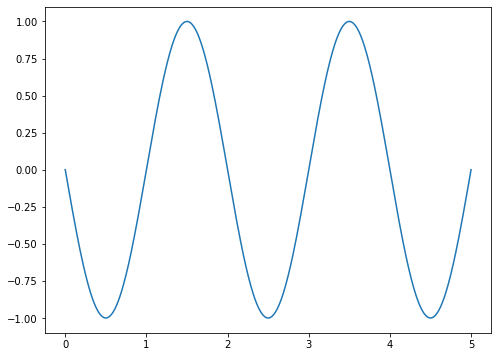

In [118]:
plotagem(-1)

In [119]:
interact(plotagem, param=2)

interactive(children=(IntSlider(value=2, description='param', max=6, min=-2), Output()), _dom_classes=('widget…

<function __main__.plotagem(param)>

# Prática

## Carregar os 3 csvs em dataframes:

* AtivoCarteira.csv
* AtivoTabelaPreco.csv
* AtivoPrecoUnidade.csv

In [52]:
ativo_carteira_df = pd.read_csv('AtivoCarteira.csv')
ativo_carteira_df

,ativos,qtd
0,A,15
1,C,38
2,E,101


In [53]:
ativo_tabela_preco_df = pd.read_csv('AtivoTabelaPreco.csv')
ativo_tabela_preco_df

,DATA,A,B,C,D,E
0,2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951
1,2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685
2,2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531
3,2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722
4,2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614
...,...,...,...,...,...,...
995,2019-12-26,-0.031635,0.039970,-0.037060,-0.035755,0.032632
996,2019-12-27,-0.024977,-0.031029,0.048233,0.038002,0.045246
997,2019-12-28,0.038493,0.012398,-0.045488,-0.004896,0.041029
998,2019-12-29,-0.009203,-0.043832,0.028211,-0.048818,0.025187


In [54]:
ativo_preco_unidade_df = pd.read_csv('AtivoPrecoUnidade.csv')
ativo_preco_unidade_df

,ativo,preco_unidade
0,A,14
1,B,32
2,C,12
3,D,13
4,E,31


## Incluir no dataframe da carteira o preço de seus ativos

In [123]:
ativo_carteira_df = ativo_carteira_df.merge(ativo_preco_unidade_df, left_on='ativos', right_on='ativo')
ativo_carteira_df

,ativos,qtd,ativo,preco_unidade
0,A,15,A,14
1,C,38,C,12
2,E,101,E,31


In [124]:
ativo_carteira_df = ativo_carteira_df.drop(columns='ativo')
ativo_carteira_df

,ativos,qtd,preco_unidade
0,A,15,14
1,C,38,12
2,E,101,31


## Incluir na nossa carteira quanto dinheiro temos por ativo


In [125]:
ativo_carteira_df['valor'] = ativo_carteira_df['qtd'] * ativo_carteira_df['preco_unidade']
ativo_carteira_df

,ativos,qtd,preco_unidade,valor
0,A,15,14,210
1,C,38,12,456
2,E,101,31,3131


## Incluir na nossa tabela de rendimento por mês o valor dessas ações no dia

In [126]:
ativo_tabela_preco_df.set_index('DATA', inplace=True)
ativo_tabela_preco_df

,A,B,C,D,E
DATA,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614
...,...,...,...,...,...
2019-12-26,-0.031635,0.039970,-0.037060,-0.035755,0.032632
2019-12-27,-0.024977,-0.031029,0.048233,0.038002,0.045246
2019-12-28,0.038493,0.012398,-0.045488,-0.004896,0.041029


In [164]:
ativos = ativo_tabela_preco_df.columns

In [165]:
ativos

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

## Calcula o cumprod

In [166]:
for ativo in ativos:
    cumprod = (ativo_tabela_preco_df[ativo] + 1).cumprod()
    ativo_tabela_preco_df[f'{ativo}_cumprod'] = cumprod

In [167]:
ativo_tabela_preco_df

,A,B,C,D,E,A_cumprod,B_cumprod,C_cumprod,D_cumprod,E_cumprod
DATA,,,,,,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951,1.002811,0.981987,1.032058,1.030823,1.048951
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685,1.039938,1.022584,1.048037,1.081275,1.016764
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531,1.028745,0.974359,1.072986,1.083743,0.966403
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722,0.997697,1.008758,1.042825,1.128248,0.970966
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614,0.966254,1.033763,0.994096,1.122725,1.012343
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,-0.031635,0.039970,-0.037060,-0.035755,0.032632,2.449419,0.262362,0.450427,0.571912,0.766283
2019-12-27,-0.024977,-0.031029,0.048233,0.038002,0.045246,2.388240,0.254221,0.472152,0.593646,0.800954
2019-12-28,0.038493,0.012398,-0.045488,-0.004896,0.041029,2.480171,0.257373,0.450675,0.590739,0.833816


## Calcula o valor por dia

In [168]:
ativo_preco_unidade_df.set_index('ativo', inplace=True)
ativo_preco_unidade_df

,preco_unidade
ativo,
A,14
B,32
C,12
D,13
E,31


In [169]:
for ativo in ativos:
    preco = ativo_preco_unidade_df.loc[ativo, 'preco_unidade']
    valores_diarios = ativo_tabela_preco_df[f'{ativo}_cumprod'] * preco
    ativo_tabela_preco_df[f'{ativo}_valor_diario'] = valores_diarios

In [171]:
ativo_tabela_preco_df

,A,B,C,D,E,A_cumprod,B_cumprod,C_cumprod,D_cumprod,E_cumprod,A_valor_diario,B_valor_diario,C_valor_diario,D_valor_diario,E_valor_diario
DATA,,,,,,,,,,,,,,,
2017-04-05,0.002811,-0.018013,0.032058,0.030823,0.048951,1.002811,0.981987,1.032058,1.030823,1.048951,14.039357,31.423599,12.384701,13.400694,32.517493
2017-04-06,0.037022,0.041341,0.015483,0.048944,-0.030685,1.039938,1.022584,1.048037,1.081275,1.016764,14.559127,32.722675,12.576448,14.056574,31.519695
2017-04-07,-0.010763,-0.047160,0.023805,0.002283,-0.049531,1.028745,0.974359,1.072986,1.083743,0.966403,14.402427,31.179484,12.875828,14.088664,29.958482
2017-04-08,-0.030180,0.035305,-0.028110,0.041066,0.004722,0.997697,1.008758,1.042825,1.128248,0.970966,13.967761,32.280271,12.513894,14.667222,30.099958
2017-04-09,-0.031515,0.024788,-0.046728,-0.004896,0.042614,0.966254,1.033763,0.994096,1.122725,1.012343,13.527560,33.080424,11.929149,14.595419,31.382635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,-0.031635,0.039970,-0.037060,-0.035755,0.032632,2.449419,0.262362,0.450427,0.571912,0.766283,34.291865,8.395594,5.405122,7.434858,23.754771
2019-12-27,-0.024977,-0.031029,0.048233,0.038002,0.045246,2.388240,0.254221,0.472152,0.593646,0.800954,33.435358,8.135087,5.665829,7.717393,24.829573
2019-12-28,0.038493,0.012398,-0.045488,-0.004896,0.041029,2.480171,0.257373,0.450675,0.590739,0.833816,34.722397,8.235942,5.408104,7.679611,25.848309


## Tan

In [172]:
ativo_preco = [f'{ativo}_valor_diario' for ativo in ativos]

In [173]:
ativo_preco

['A_valor_diario',
 'B_valor_diario',
 'C_valor_diario',
 'D_valor_diario',
 'E_valor_diario']

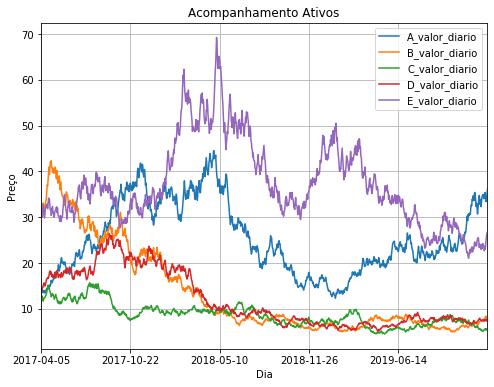

In [175]:
ativo_tabela_preco_df[ativo_preco].plot(
    figsize=(8, 6),
    title='Acompanhamento Ativos', grid=True).set(ylabel='Preço', xlabel='Dia')
plt.show()

In [182]:
plt.xticks?

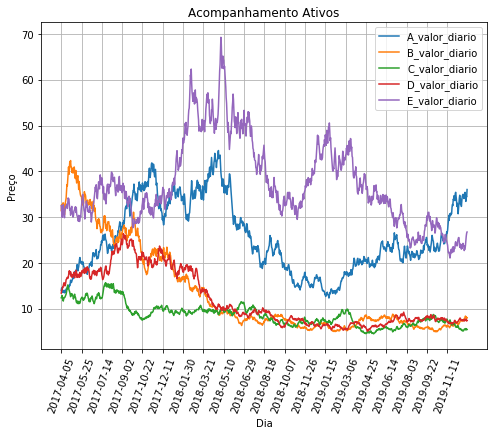

In [184]:
plt.figure(figsize=(8, 6))
x = np.arange(len(ativo_tabela_preco_df))
for ativo in ativo_preco:
    plt.plot(x, ativo_tabela_preco_df[ativo].tolist(), label=ativo)
plt.legend()
plt.xticks(x[::50], ativo_tabela_preco_df.index[::50], rotation=70)
plt.grid()
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.title('Acompanhamento Ativos')
plt.show()